# **TASK2: CAR PRICE PREDICTION WITH MACHINE LEARNING**

Importing all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv('car_data.csv')

In [ ]:
# Display the first few rows
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
# Display summary statistics
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
# Drop rows with missing values (or use other imputation methods)
df.dropna(inplace=True)

In [7]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

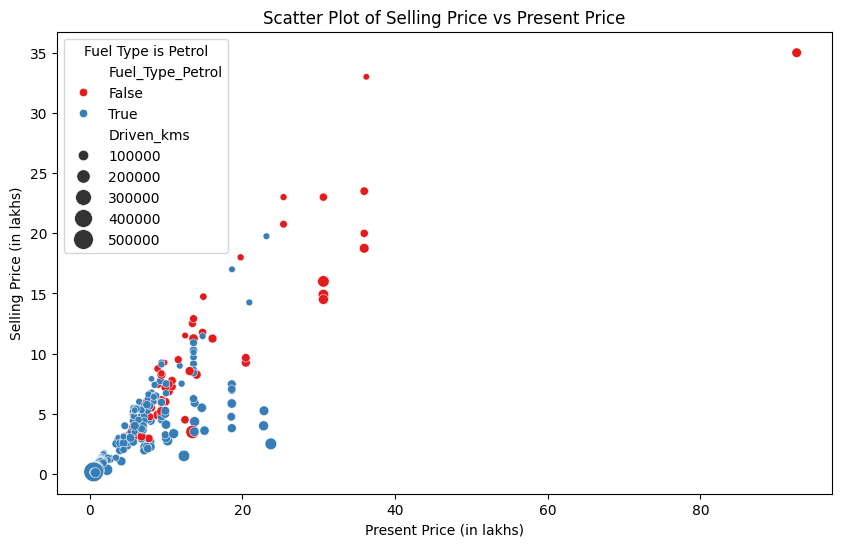

In [9]:
# Scatter plot of Selling_Price vs Present_Price
plt.figure(figsize=(10, 6))
# Use one of the newly created one-hot encoded columns for hue, for example 'Fuel_Type_Petrol'
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type_Petrol', palette='Set1', size='Driven_kms', sizes=(20, 200))
plt.title('Scatter Plot of Selling Price vs Present Price')
plt.xlabel('Present Price (in lakhs)')
plt.ylabel('Selling Price (in lakhs)')
plt.legend(title='Fuel Type is Petrol', loc='upper left') # Adjust legend title
plt.show()

<ipython-input-10-9c4d8d092e25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Owner', y='Selling_Price', data=df, palette='Set3')


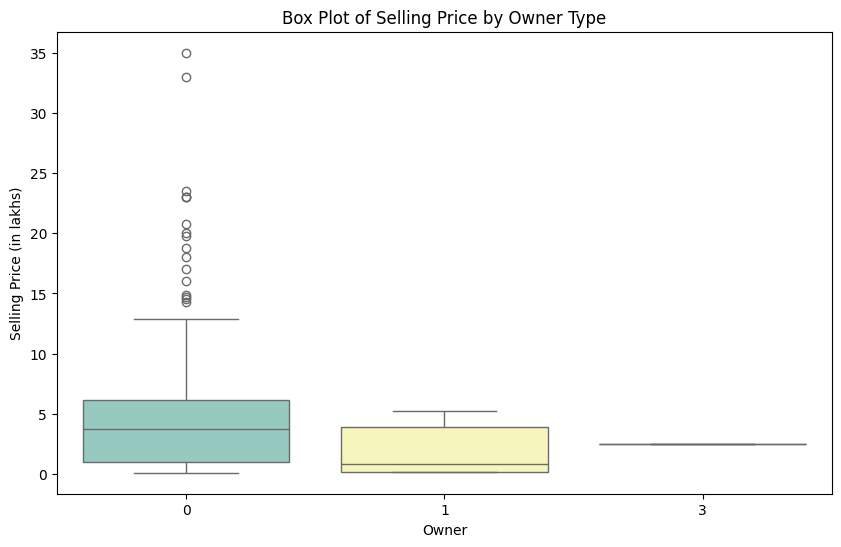

In [10]:
# Box plot of Selling_Price grouped by Owner type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owner', y='Selling_Price', data=df, palette='Set3')
plt.title('Box Plot of Selling Price by Owner Type')
plt.xlabel('Owner')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

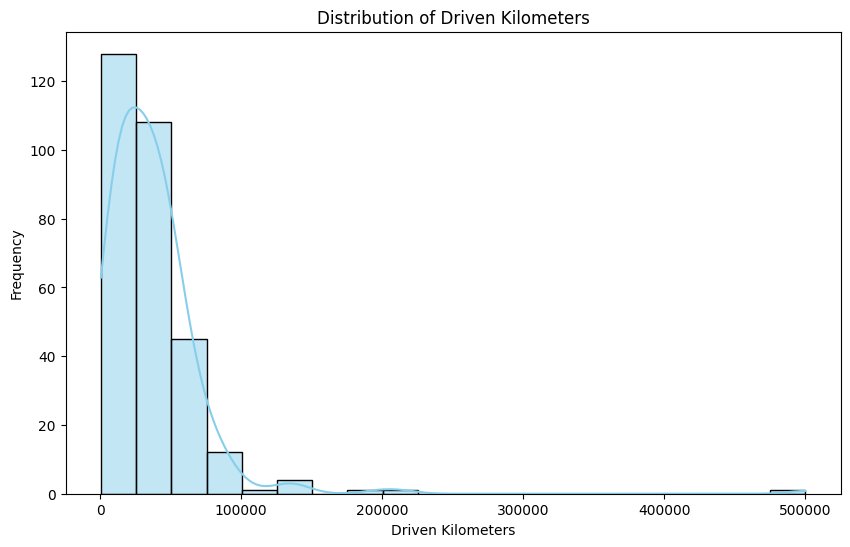

In [11]:
# Histogram of Driven_kms
plt.figure(figsize=(10, 6))
sns.histplot(df['Driven_kms'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Driven Kilometers')
plt.xlabel('Driven Kilometers')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-49f21636a871>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type_Petrol', data=df, palette='pastel')  # Use one of the new one-hot encoded columns


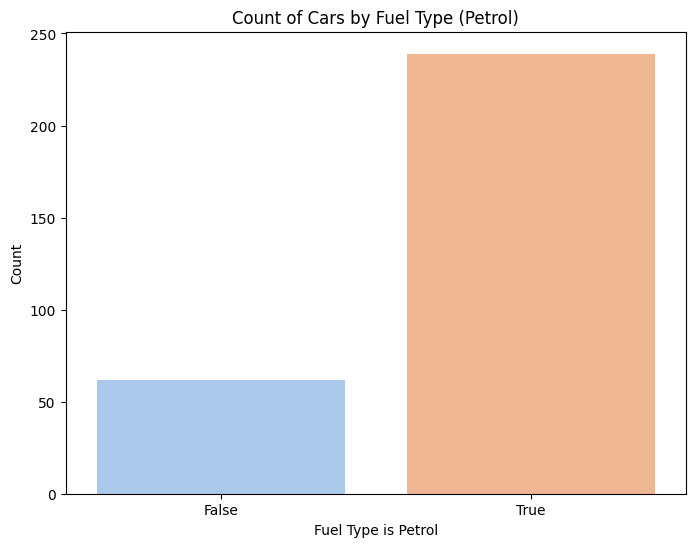

In [13]:
# Count plot of Fuel Types (using one of the one-hot encoded columns)
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type_Petrol', data=df, palette='pastel')  # Use one of the new one-hot encoded columns
plt.title('Count of Cars by Fuel Type (Petrol)')  # Adjust title accordingly
plt.xlabel('Fuel Type is Petrol')  # Adjust x-axis label accordingly
plt.ylabel('Count')
plt.show()

<ipython-input-18-409cba74070d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Transmission_Manual', y='Selling_Price', data=df, palette='Set2')


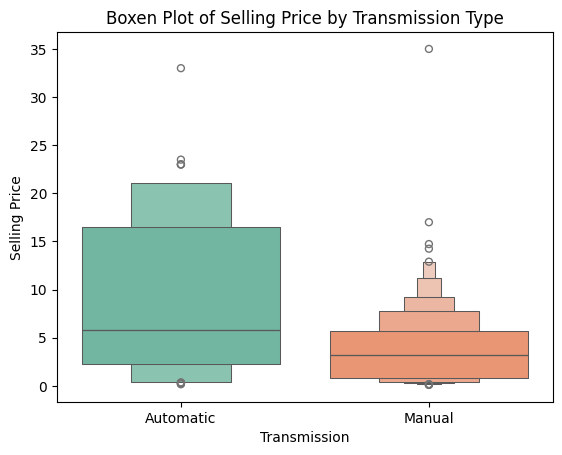

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a boxen plot
sns.boxenplot(x='Transmission_Manual', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxen Plot of Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.xticks(ticks=[0, 1], labels=['Automatic', 'Manual'])
plt.show()


<ipython-input-21-7945df1c65ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Fuel_Type', y='Present_Price', data=df, palette='Set2')


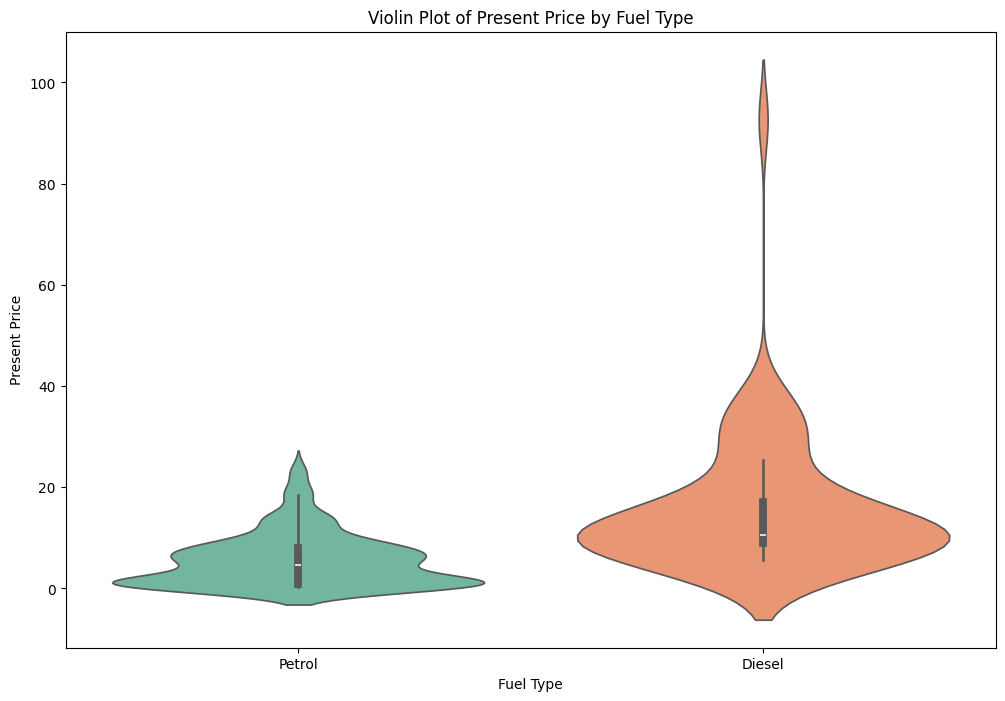

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a new 'Fuel_Type' column
df['Fuel_Type'] = df.apply(lambda row: 'Diesel' if row['Fuel_Type_Diesel'] == 1 else 'Petrol', axis=1)

# Creating a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Fuel_Type', y='Present_Price', data=df, palette='Set2')
plt.title('Violin Plot of Present Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Present Price')
plt.show()


<ipython-input-22-9690a269e4a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Fuel_Type', y='Present_Price', data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


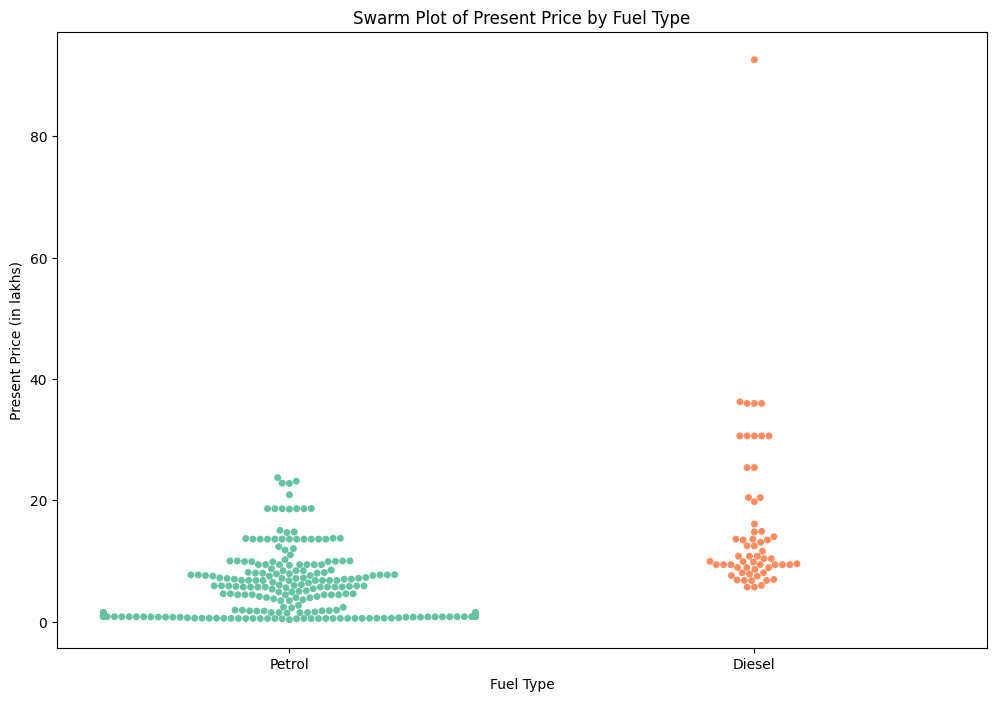

In [22]:
# Swarm plot of Present_Price by Fuel_Type
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Fuel_Type', y='Present_Price', data=df, palette='Set2')
plt.title('Swarm Plot of Present Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Present Price (in lakhs)')
plt.show()

<Figure size 1000x800 with 0 Axes>

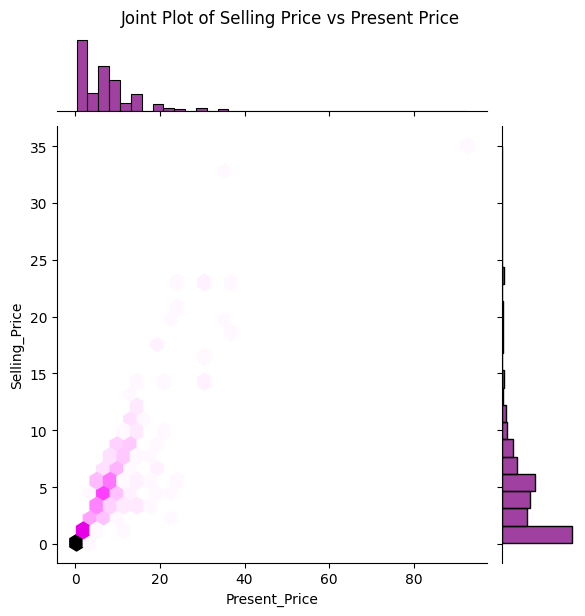

In [23]:
# Joint plot of Selling_Price and Present_Price
plt.figure(figsize=(10, 8))
sns.jointplot(x='Present_Price', y='Selling_Price', data=df, kind='hex', color='purple')
plt.suptitle('Joint Plot of Selling Price vs Present Price', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

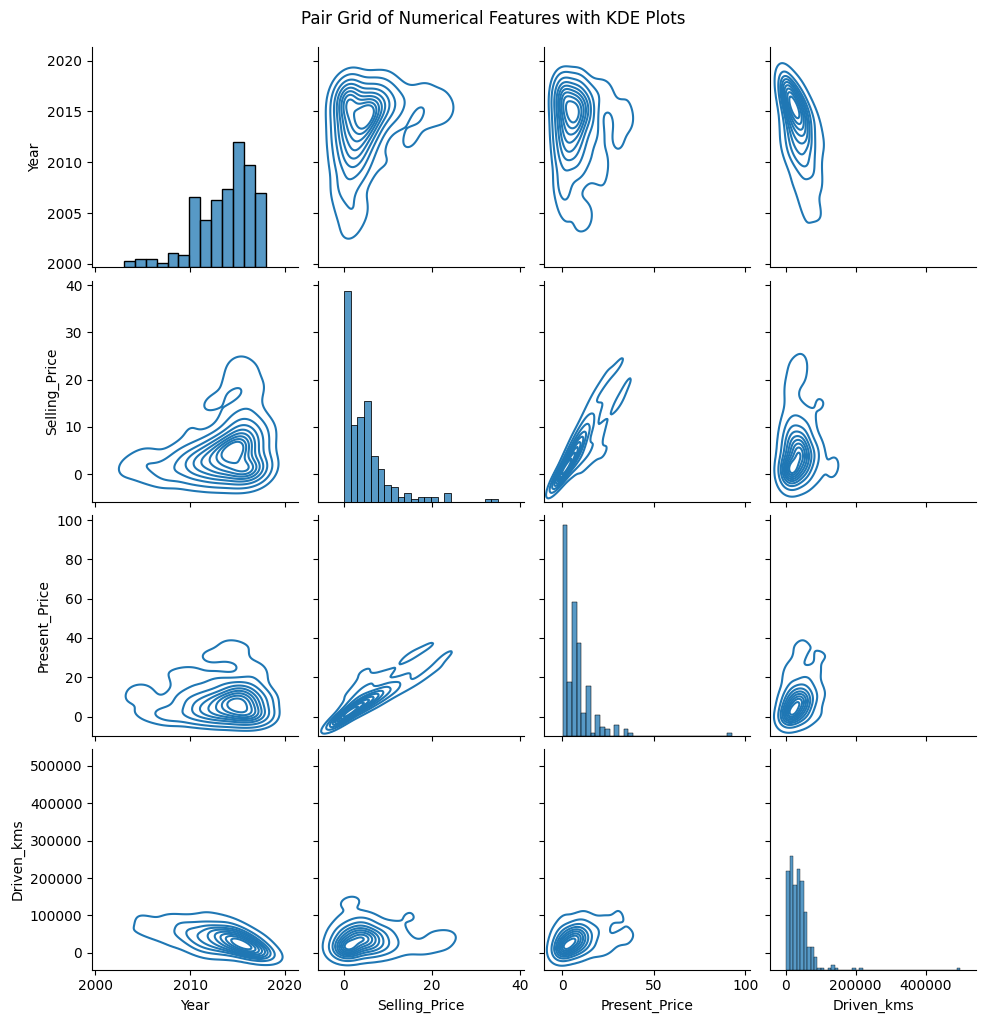

In [24]:
# Pair grid of numerical features with KDE plots
num_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
sns.pairplot(df[num_features], kind='kde', diag_kind='hist', palette='Set1')
plt.suptitle('Pair Grid of Numerical Features with KDE Plots', y=1.02)
plt.show()

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_sx4', 'Car_Name_verna', 'Car_Name_vitara brezza',
       'Car_Name_wagon r', 'Car_Name_xcent', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual',
       'Fuel_Type'],
      dtype='object', length=107)


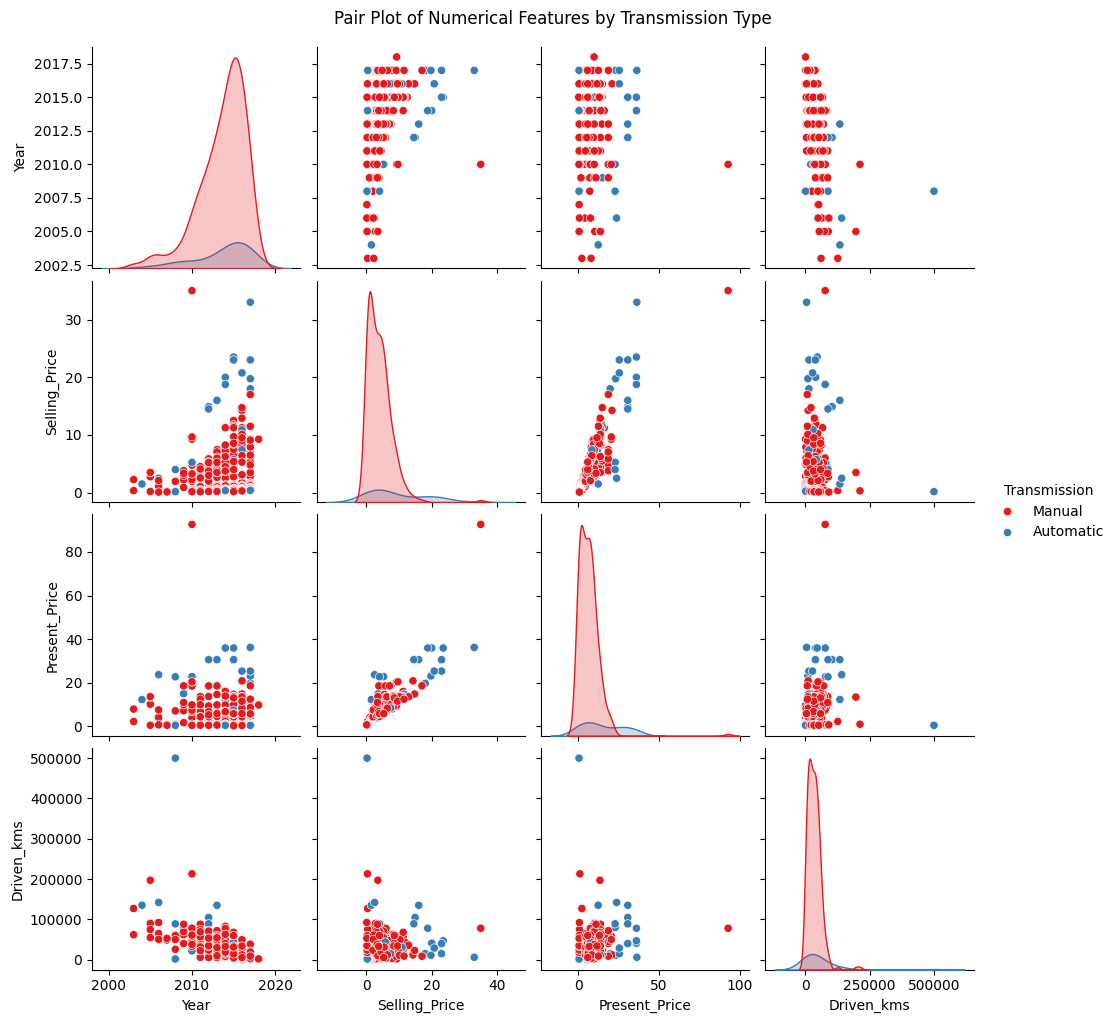

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verify the existence of 'Transmission_Manual' column
print(df.columns)

# Check if 'Transmission_Manual' exists and create 'Transmission' column
if 'Transmission_Manual' in df.columns:
    df['Transmission'] = df['Transmission_Manual'].apply(lambda x: 'Manual' if x == 1 else 'Automatic')
else:
    print("The column 'Transmission_Manual' does not exist.")

# Ensure the 'Transmission' column is created
if 'Transmission' in df.columns:
    # Creating the pair plot
    sns.pairplot(df, vars=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms'], hue='Transmission', palette='Set1')
    plt.suptitle('Pair Plot of Numerical Features by Transmission Type', y=1.02)
    plt.show()
else:
    print("The column 'Transmission' does not exist. Please ensure it is created correctly.")


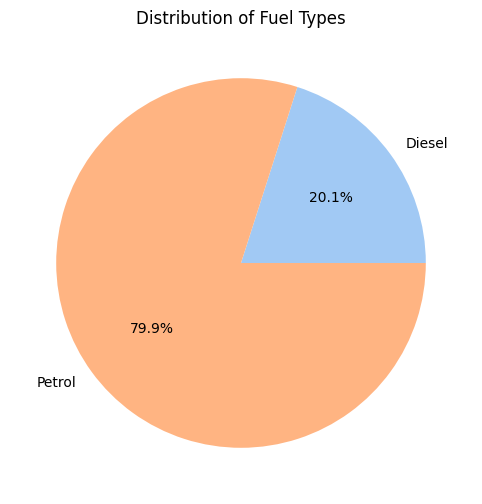

In [28]:
# Sum the dummy variables to get counts
fuel_counts = df[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']].sum()

plt.figure(figsize=(8, 6))
plt.pie(fuel_counts, labels=fuel_counts.index.str.replace('Fuel_Type_', ''), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Fuel Types')
plt.show()


<ipython-input-29-2c777ed73628>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='magma')


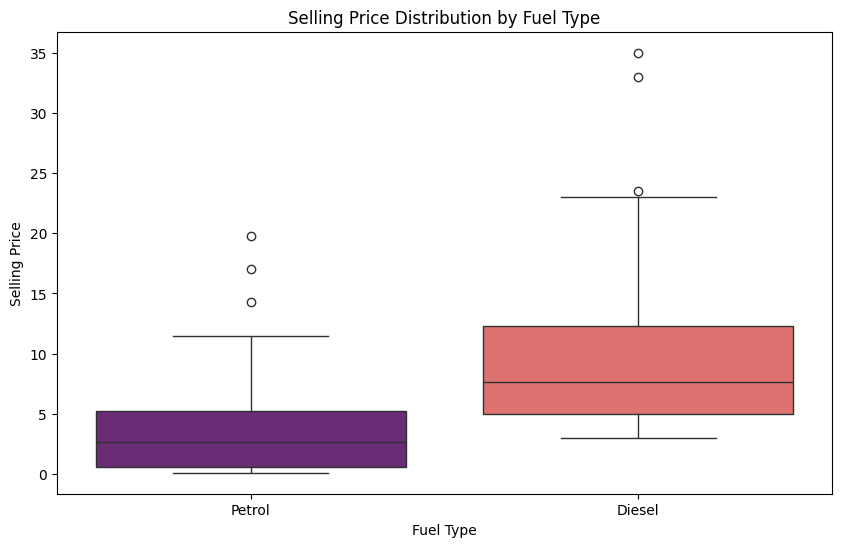

In [29]:
# Convert dummy variables back to categorical data
df['Fuel_Type'] = df[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']].idxmax(axis=1).str.replace('Fuel_Type_', '')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='magma')
plt.title('Selling Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


<ipython-input-30-5d532d8c786d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_counts_by_year.index, y=car_counts_by_year.values, palette='viridis')


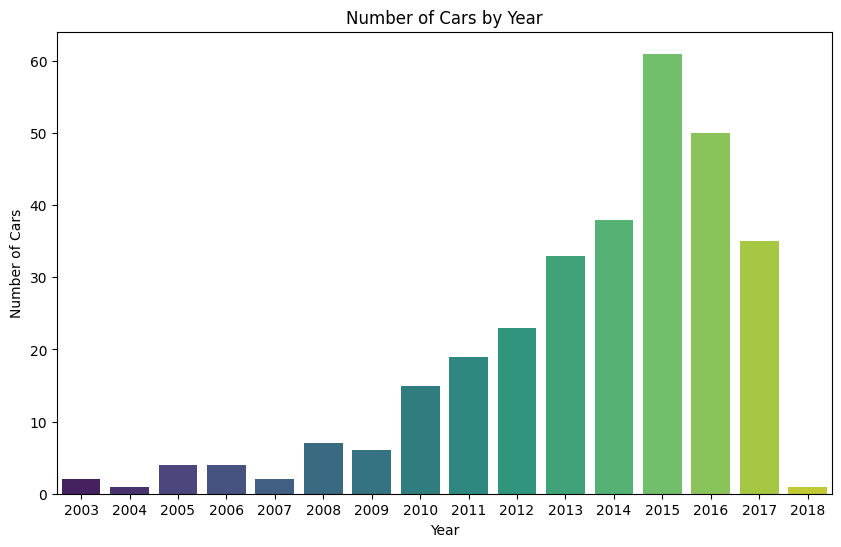

In [30]:
car_counts_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=car_counts_by_year.index, y=car_counts_by_year.values, palette='viridis')
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

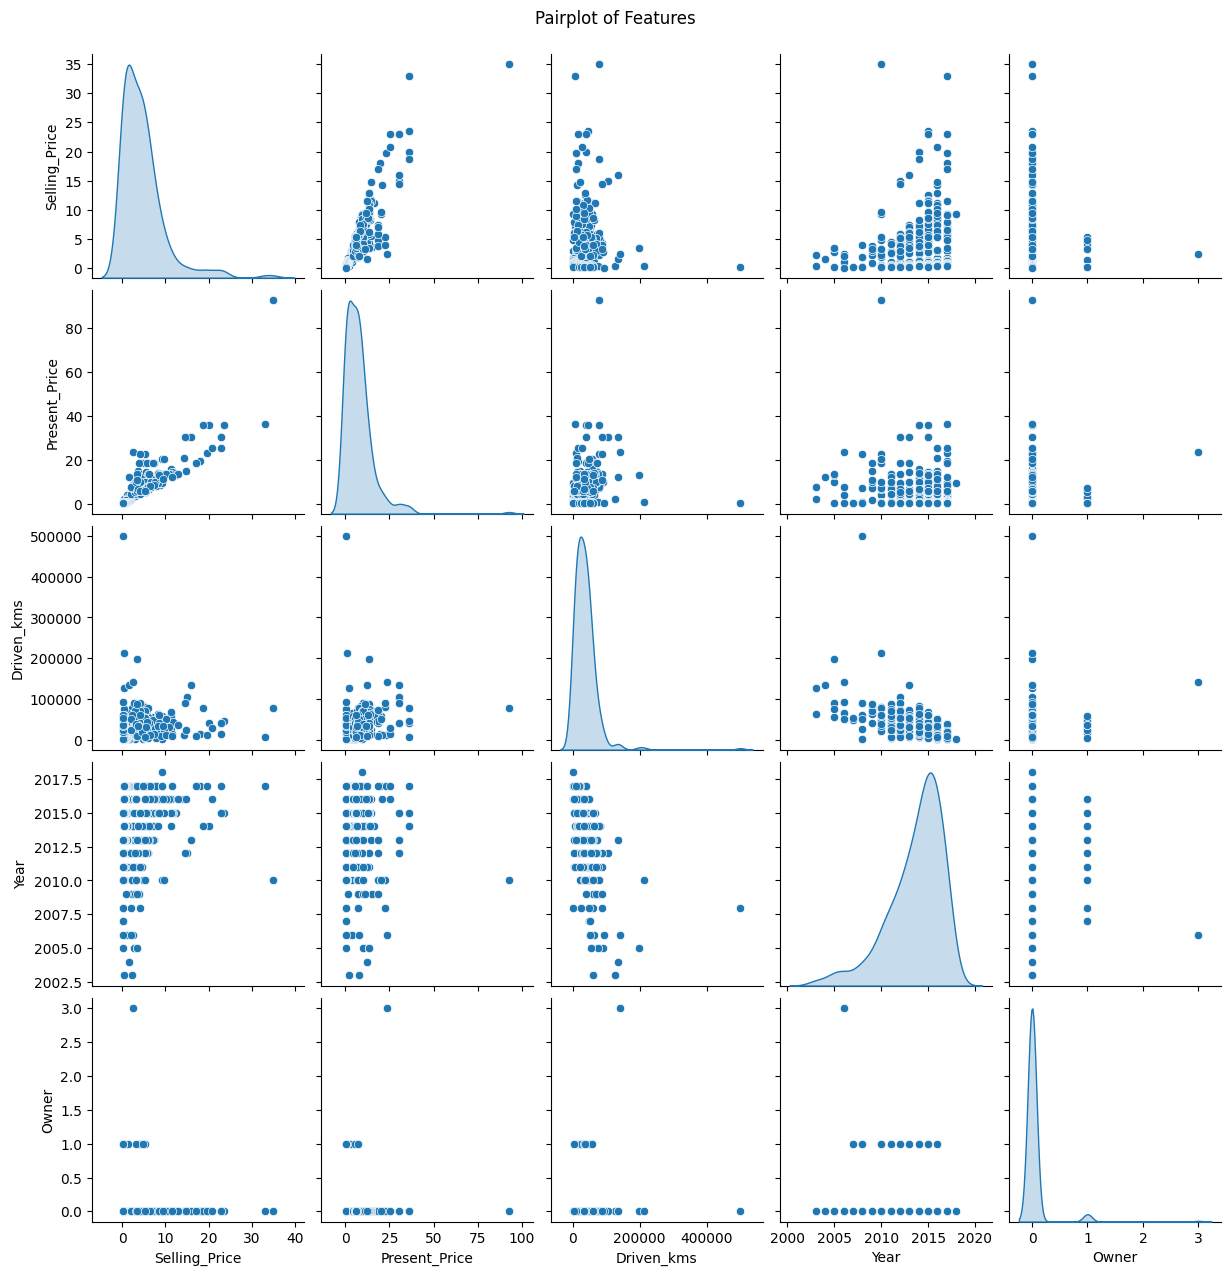

In [31]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Year', 'Owner']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


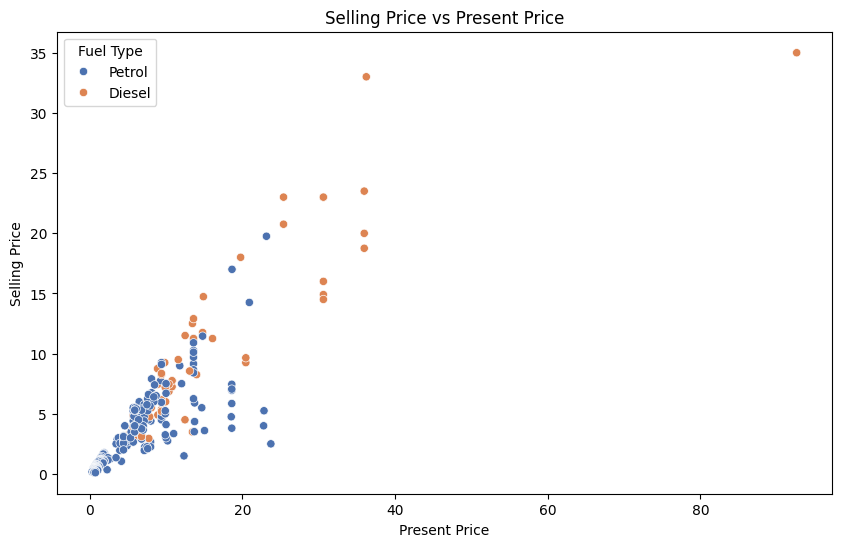

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', palette='deep')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

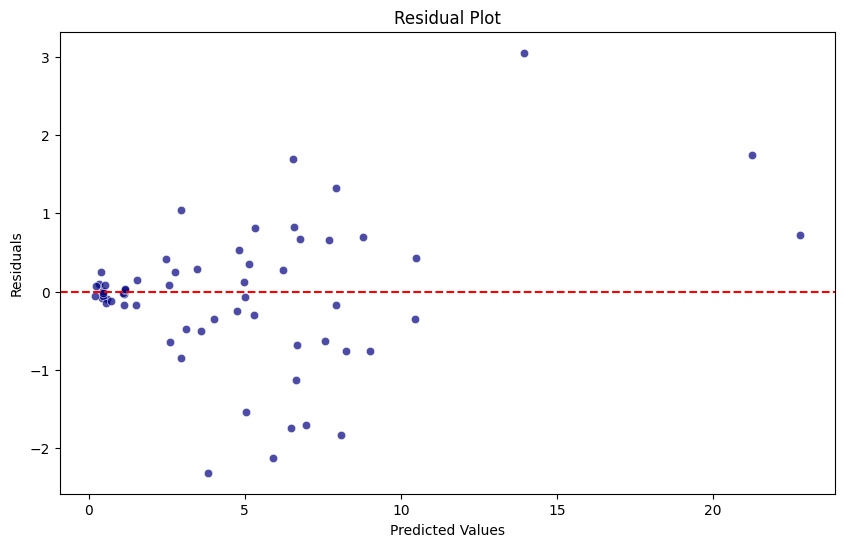

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Fuel_Type' and 'Transmission' columns have already been created
df['Transmission'] = df['Transmission_Manual'].apply(lambda x: 'Manual' if x == 1 else 'Automatic')
df['Fuel_Type'] = df.apply(lambda row: 'Diesel' if row['Fuel_Type_Diesel'] == 1 else 'Petrol', axis=1)

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner'])

# Separate features and target variable
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='navy')
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


<ipython-input-35-b97d125995a6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Selling_Price'], shade=True, color='darkblue')


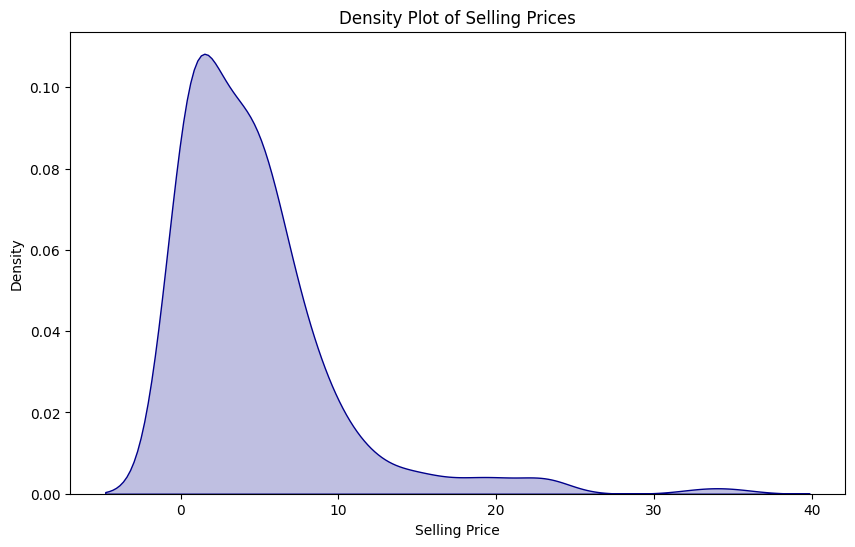

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Selling_Price'], shade=True, color='darkblue')
plt.title('Density Plot of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()

In [36]:
# Separate features and target variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Fuel_Type' and 'Transmission' columns have already been created
df['Transmission'] = df['Transmission_Manual'].apply(lambda x: 'Manual' if x == 1 else 'Automatic')
df['Fuel_Type'] = df.apply(lambda row: 'Diesel' if row['Fuel_Type_Diesel'] == 1 else 'Petrol', axis=1)

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner'])

# Separate features and target variable
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the columns of X_train to verify data is correctly encoded
print(X_train.columns)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Index(['Year', 'Present_Price', 'Driven_kms', 'Car_Name_Activa 3g',
       'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi',
       ...
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_0', 'Owner_1', 'Owner_3'],
      dtype='object', length=111)


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [43]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8086349232786886
R-squared: 0.964896270699516


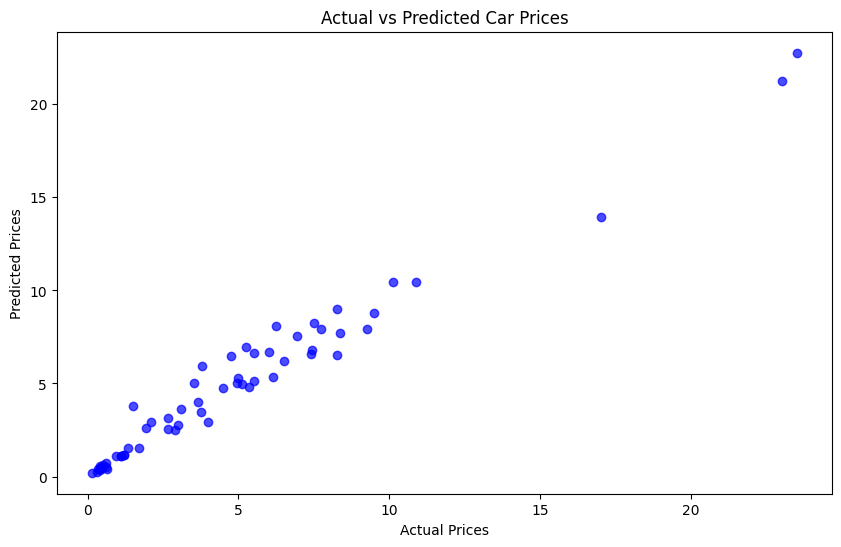

In [45]:
# Plot true vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()

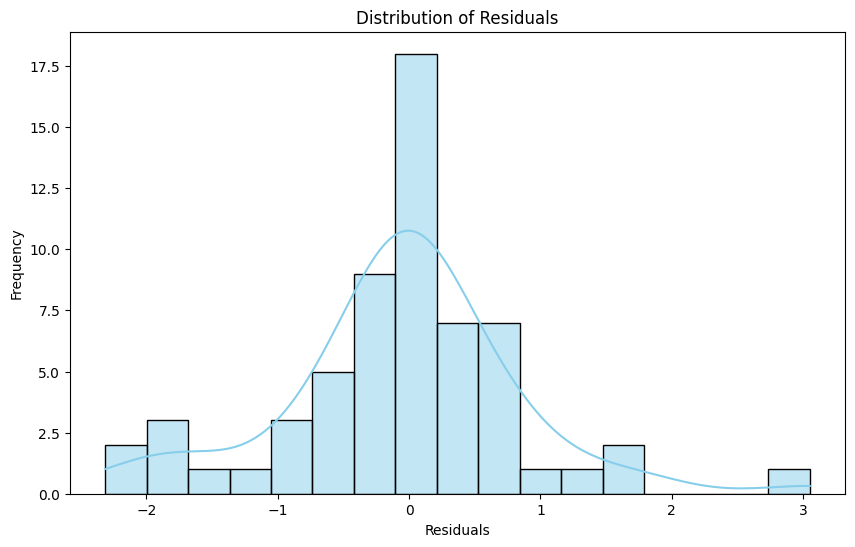

In [46]:
# Plot distribution of residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()